##### Steps for reading in dataset (following download), initial QC, dim reduction/clustering and saving out the myeloid cluster for **GSE212966**

file previously downloaded:
GSE212966_RAW.tar

unzipped using 
``` bash
tar -xvf GSE212966_RAW.tar
```

This gives the following files: 
* GSM6567157_PDAC1_barcodes.tsv.gz
* GSM6567157_PDAC1_genes.tsv.gz
* GSM6567157_PDAC1_matrix.mtx.gz
* GSM6567159_PDAC2_barcodes.tsv.gz
* GSM6567159_PDAC2_genes.tsv.gz
* GSM6567159_PDAC2_matrix.mtx.gz
* GSM6567160_PDAC3_barcodes.tsv.gz
* GSM6567160_PDAC3_genes.tsv.gz
* GSM6567160_PDAC3_matrix.mtx.gz
* GSM6567161_PDAC4_barcodes.tsv.gz
* GSM6567161_PDAC4_genes.tsv.gz
* GSM6567161_PDAC4_matrix.mtx.gz
* GSM6567163_PDAC5_barcodes.tsv.gz
* GSM6567163_PDAC5_genes.tsv.gz
* GSM6567163_PDAC5_matrix.mtx.gz
* GSM6567164_PDAC6_barcodes.tsv.gz
* GSM6567164_PDAC6_genes.tsv.gz
* GSM6567164_PDAC6_matrix.mtx.gz
* GSM6567165_ADJ1_barcodes.tsv.gz
* GSM6567165_ADJ1_genes.tsv.gz
* GSM6567165_ADJ1_matrix.mtx.gz
* GSM6567166_ADJ2_barcodes.tsv.gz
* GSM6567166_ADJ2_genes.tsv.gz
* GSM6567166_ADJ2_matrix.mtx.gz
* GSM6567167_ADJ3_barcodes.tsv.gz
* GSM6567167_ADJ3_genes.tsv.gz
* GSM6567167_ADJ3_matrix.mtx.gz
* GSM6567169_ADJ4_barcodes.tsv.gz
* GSM6567169_ADJ4_genes.tsv.gz
* GSM6567169_ADJ4_matrix.mtx.gz
* GSM6567170_ADJ5_barcodes.tsv.gz
* GSM6567170_ADJ5_genes.tsv.gz
* GSM6567170_ADJ5_matrix.mtx.gz
* GSM6567171_ADJ6_barcodes.tsv.gz
* GSM6567171_ADJ6_genes.tsv.gz
* GSM6567171_ADJ6_matrix.mtx.gz


Files were then organised into seperate folders for each patient and named with correct file names.

In [1]:
#set wd
getwd()
setwd('/scratch/user/s4436039/scdata/GSE212966')
getwd()

[1] "/scratch/user/s4436039/Nikita-project"

[1] "/scratch/user/s4436039/scdata/GSE212966"

In [2]:
#Load packages
library(dplyr)
library(Seurat)
library(patchwork)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Warning message:
“package ‘Seurat’ was built under R version 4.3.2”
Loading required package: SeuratObject

Loading required package: sp

Warning message:
“package ‘sp’ was built under R version 4.3.2”

Attaching package: ‘SeuratObject’


The following object is masked from ‘package:base’:

    intersect


Warning message:
“package ‘patchwork’ was built under R version 4.3.2”


In [7]:
#load all datasets
PDAC1.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE212966/PDAC1")
PDAC2.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE212966/PDAC2")
PDAC3.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE212966/PDAC3")
PDAC4.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE212966/PDAC4")
PDAC5.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE212966/PDAC5")
PDAC6.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE212966/PDAC6")
ADJ1.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE212966/ADJ1")
ADJ2.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE212966/ADJ2")
ADJ3.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE212966/ADJ3")
ADJ6.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE212966/ADJ6")


Warning message:
“readMM(): expected 5681133 entries but found only 452”


In [8]:
ADJ4.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE212966/ADJ4")
ADJ5.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE212966/ADJ5")

Warning message:
“readMM(): expected 10326987 entries but found only 451”
Warning message in readLines(con = barcode.loc):
“incomplete final line found on '/scratch/user/s4436039/scdata/GSE212966/ADJ4/barcodes.tsv.gz'”


ERROR: Error in fixupDN.if.valid(value, x@Dim): length of Dimnames[[2]] (219) is not equal to Dim[2] (5799)


### Here onwards not run yet for GSE212966

In [18]:
#Add dataset info to colnames
colnames(PDAC_Case1_YF.data) <- paste0("GSE197177_Case1-YF_", colnames(PDAC_Case1_YF.data))
colnames(PDAC_Case1_ZY.data) <- paste0("GSE197177_Case1-ZY_", colnames(PDAC_Case1_ZY.data))
colnames(PDAC_Case2_YF.data) <- paste0("GSE197177_Case2-YF_", colnames(PDAC_Case2_YF.data))
colnames(PDAC_Case2_ZC.data) <- paste0("GSE197177_Case2-ZC_", colnames(PDAC_Case2_ZC.data))
colnames(PDAC_Case2_ZY.data) <- paste0("GSE197177_Case2-ZY_", colnames(PDAC_Case2_ZY.data))
colnames(PDAC_Case3_YF.data) <- paste0("GSE197177_Case3-YF_", colnames(PDAC_Case3_YF.data))
colnames(PDAC_Case3_ZY.data) <- paste0("GSE197177_Case3-ZY_", colnames(PDAC_Case3_ZY.data))
colnames(PDAC_Case4_ZY.data) <- paste0("GSE197177_Case4-ZY_", colnames(PDAC_Case4_ZY.data))

In [20]:
head(colnames(PDAC_Case4_ZY.data))

[1] "GSE197177_Case4-ZY_AAACCCATCCACTTCG-1"
[2] "GSE197177_Case4-ZY_AAACGAAAGTAGCCAG-1"
[3] "GSE197177_Case4-ZY_AAACGAACAACACAAA-1"
[4] "GSE197177_Case4-ZY_AAACGAACAGTCTACA-1"
[5] "GSE197177_Case4-ZY_AAACGAAGTTCCACGG-1"
[6] "GSE197177_Case4-ZY_AAACGCTTCGTAATGC-1"

In [22]:
#create seperate seurat object for each sample
PDAC_Case1_YF <- CreateSeuratObject(counts = PDAC_Case1_YF.data, project = "GSE197177", min.cells = 3, min.features = 200)

#add metadata to sample
PDAC_Case1_YF@meta.data$sample_type <- "tumour"
PDAC_Case1_YF@meta.data$cancer_type <- "PDAC"
PDAC_Case1_YF@meta.data$patient_id <- "Case1"

In [24]:
#Repeat for remaining samples

#create seperate seurat object for each sample
PDAC_Case1_ZY <- CreateSeuratObject(counts = PDAC_Case1_ZY.data, project = "GSE197177", min.cells = 3, min.features = 200)

#add metadata to sample
PDAC_Case1_ZY@meta.data$sample_type <- "hepatic_mets"
PDAC_Case1_ZY@meta.data$cancer_type <- "PDAC"
PDAC_Case1_ZY@meta.data$patient_id <- "Case1"

#create seperate seurat object for each sample
PDAC_Case2_YF <- CreateSeuratObject(counts = PDAC_Case2_YF.data, project = "GSE197177", min.cells = 3, min.features = 200)

#add metadata to sample
PDAC_Case2_YF@meta.data$sample_type <- "tumour"
PDAC_Case2_YF@meta.data$cancer_type <- "PDAC"
PDAC_Case2_YF@meta.data$patient_id <- "Case2"

#create seperate seurat object for each sample
PDAC_Case2_ZC <- CreateSeuratObject(counts = PDAC_Case2_ZC.data, project = "GSE197177", min.cells = 3, min.features = 200)

#add metadata to sample
PDAC_Case2_ZC@meta.data$sample_type <- "healthy_pancreas"
PDAC_Case2_ZC@meta.data$cancer_type <- "healthy"
PDAC_Case2_ZC@meta.data$patient_id <- "Case2"

#create seperate seurat object for each sample
PDAC_Case2_ZY <- CreateSeuratObject(counts = PDAC_Case2_ZY.data, project = "GSE197177", min.cells = 3, min.features = 200)

#add metadata to sample
PDAC_Case2_ZY@meta.data$sample_type <- "hepatic_mets"
PDAC_Case2_ZY@meta.data$cancer_type <- "PDAC"
PDAC_Case2_ZY@meta.data$patient_id <- "Case2"

#create seperate seurat object for each sample
PDAC_Case3_YF <- CreateSeuratObject(counts = PDAC_Case3_YF.data, project = "GSE197177", min.cells = 3, min.features = 200)

#add metadata to sample
PDAC_Case3_YF@meta.data$sample_type <- "tumour"
PDAC_Case3_YF@meta.data$cancer_type <- "PDAC"
PDAC_Case3_YF@meta.data$patient_id <- "Case3"

#create seperate seurat object for each sample
PDAC_Case3_ZY <- CreateSeuratObject(counts = PDAC_Case3_ZY.data, project = "GSE197177", min.cells = 3, min.features = 200)

#add metadata to sample
PDAC_Case3_ZY@meta.data$sample_type <- "hepatic_mets"
PDAC_Case3_ZY@meta.data$cancer_type <- "PDAC"
PDAC_Case3_ZY@meta.data$patient_id <- "Case3"

#create seperate seurat object for each sample
PDAC_Case4_ZY <- CreateSeuratObject(counts = PDAC_Case4_ZY.data, project = "GSE197177", min.cells = 3, min.features = 200)

#add metadata to sample
PDAC_Case4_ZY@meta.data$sample_type <- "hepatic_mets"
PDAC_Case4_ZY@meta.data$cancer_type <- "PDAC"
PDAC_Case4_ZY@meta.data$patient_id <- "Case4"

In [25]:
head(PDAC_Case4_ZY@meta.data)

orig.ident nCount_RNA nFeature_RNA
GSE197177_Case4-ZY_AAACGAACAACACAAA-1 GSE197177  1917       1155        
GSE197177_Case4-ZY_AAACGAAGTTCCACGG-1 GSE197177  1330        808        
GSE197177_Case4-ZY_AAACGCTTCGTAATGC-1 GSE197177  1470        674        
GSE197177_Case4-ZY_AAAGAACAGGCTCTCG-1 GSE197177  1476        780        
GSE197177_Case4-ZY_AAAGAACAGGGACTGT-1 GSE197177   754        486        
GSE197177_Case4-ZY_AAAGAACCAAAGCACG-1 GSE197177  2233       1071        
                                      sample_type  cancer_type patient_id
GSE197177_Case4-ZY_AAACGAACAACACAAA-1 hepatic_mets PDAC        Case4     
GSE197177_Case4-ZY_AAACGAAGTTCCACGG-1 hepatic_mets PDAC        Case4     
GSE197177_Case4-ZY_AAACGCTTCGTAATGC-1 hepatic_mets PDAC        Case4     
GSE197177_Case4-ZY_AAAGAACAGGCTCTCG-1 hepatic_mets PDAC        Case4     
GSE197177_Case4-ZY_AAAGAACAGGGACTGT-1 hepatic_mets PDAC        Case4     
GSE197177_Case4-ZY_AAAGAACCAAAGCACG-1 hepatic_mets PDAC        Case4

In [26]:
#Merge seurat objects

PDAC <- merge(PDAC_Case1_YF, y = c(PDAC_Case1_ZY, PDAC_Case2_YF, PDAC_Case2_ZC, PDAC_Case2_ZY, PDAC_Case3_YF, PDAC_Case3_ZY, PDAC_Case4_ZY), project = "GSE197177")

In [27]:
PDAC
head(PDAC@meta.data)
tail(PDAC@meta.data)

An object of class Seurat 
25870 features across 81939 samples within 1 assay 
Active assay: RNA (25870 features, 0 variable features)
 8 layers present: counts.1, counts.2, counts.3, counts.4, counts.5, counts.6, counts.7, counts.8

orig.ident nCount_RNA nFeature_RNA
GSE197177_Case1-YF_AAACCCAAGAGCACTG-1 GSE197177   4039       946        
GSE197177_Case1-YF_AAACCCAAGCTAATCC-1 GSE197177  20821      4845        
GSE197177_Case1-YF_AAACCCAAGGCTGTAG-1 GSE197177  12283      3574        
GSE197177_Case1-YF_AAACCCAAGTTGAATG-1 GSE197177   3450      1061        
GSE197177_Case1-YF_AAACCCACAAACAGGC-1 GSE197177   4825      1767        
GSE197177_Case1-YF_AAACCCACAACTAGAA-1 GSE197177   4951      1950        
                                      sample_type cancer_type patient_id
GSE197177_Case1-YF_AAACCCAAGAGCACTG-1 tumour      PDAC        Case1     
GSE197177_Case1-YF_AAACCCAAGCTAATCC-1 tumour      PDAC        Case1     
GSE197177_Case1-YF_AAACCCAAGGCTGTAG-1 tumour      PDAC        Case1     
GSE197177_Case1-YF_AAACCCAAGTTGAATG-1 tumour      PDAC        Case1     
GSE197177_Case1-YF_AAACCCACAAACAGGC-1 tumour      PDAC        Case1     
GSE197177_Case1-YF_AAACCCACAACTAGAA-1 tumour      PDAC        Case1

orig.ident nCount_RNA nFeature_RNA
GSE197177_Case4-ZY_TTTGATCGTCACTGAT-1 GSE197177  2106        860        
GSE197177_Case4-ZY_TTTGGAGCAACTTGGT-1 GSE197177   756        341        
GSE197177_Case4-ZY_TTTGGAGCAGTTCCAA-1 GSE197177  2748       1090        
GSE197177_Case4-ZY_TTTGTTGAGGGCAGTT-1 GSE197177   867        337        
GSE197177_Case4-ZY_TTTGTTGCAAGTGCAG-1 GSE197177   572        309        
GSE197177_Case4-ZY_TTTGTTGGTGTCTTAG-1 GSE197177  3716       1275        
                                      sample_type  cancer_type patient_id
GSE197177_Case4-ZY_TTTGATCGTCACTGAT-1 hepatic_mets PDAC        Case4     
GSE197177_Case4-ZY_TTTGGAGCAACTTGGT-1 hepatic_mets PDAC        Case4     
GSE197177_Case4-ZY_TTTGGAGCAGTTCCAA-1 hepatic_mets PDAC        Case4     
GSE197177_Case4-ZY_TTTGTTGAGGGCAGTT-1 hepatic_mets PDAC        Case4     
GSE197177_Case4-ZY_TTTGTTGCAAGTGCAG-1 hepatic_mets PDAC        Case4     
GSE197177_Case4-ZY_TTTGTTGGTGTCTTAG-1 hepatic_mets PDAC        Case4

Warning message:
“Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead.”


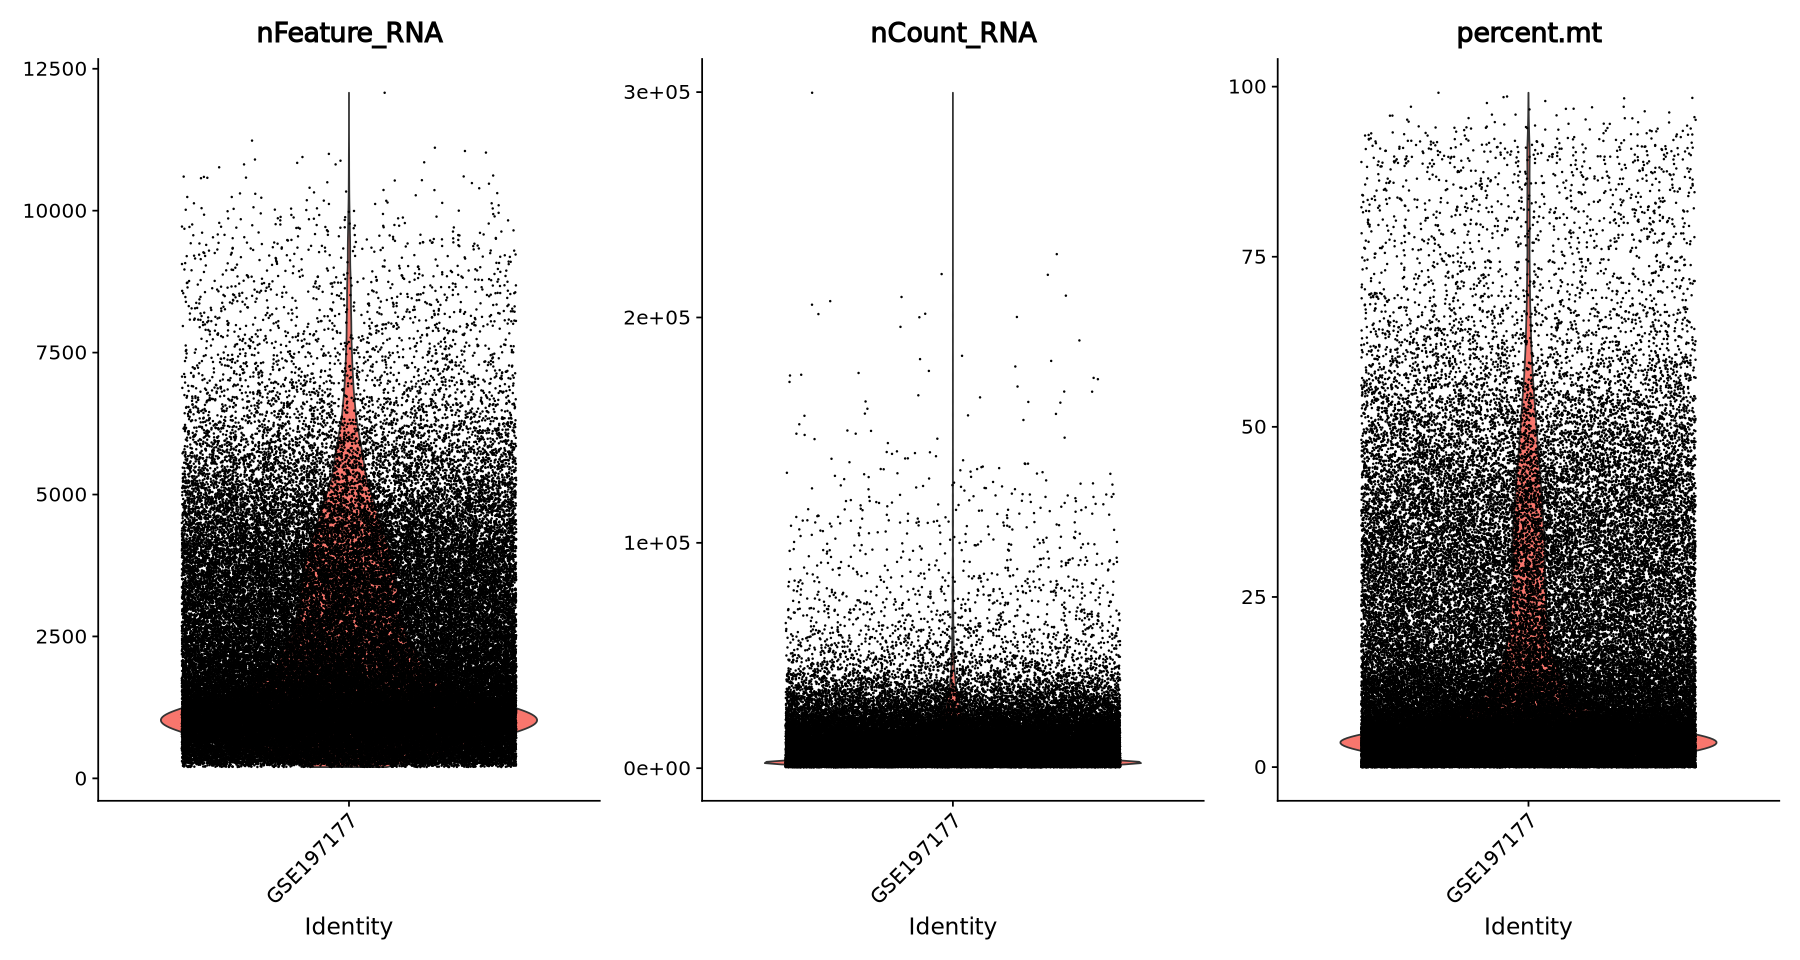

In [29]:
#QC Steps 
PDAC[["percent.mt"]] <- PercentageFeatureSet(PDAC, pattern = "^MT-")
#Visualise QC metrics
options(repr.plot.height=8, repr.plot.width=15)
VlnPlot(PDAC, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)

In [30]:
#Normalise the data
PDAC <- NormalizeData(PDAC)
#Find variable features
PDAC <- FindVariableFeatures(PDAC, selection.method = "vst", nfeatures = 2000)
#Scale the data
PDAC <- ScaleData(PDAC, vars.to.regress = c("percent.mt", "nCount_RNA"))
#Run pca
PDAC <- RunPCA(PDAC, features = VariableFeatures(object = PDAC))

Normalizing layer: counts.1

Normalizing layer: counts.2

Normalizing layer: counts.3

Normalizing layer: counts.4

Normalizing layer: counts.5

Normalizing layer: counts.6

Normalizing layer: counts.7

Normalizing layer: counts.8

Finding variable features for layer counts.1

Finding variable features for layer counts.2

Finding variable features for layer counts.3

Finding variable features for layer counts.4

Finding variable features for layer counts.5

Finding variable features for layer counts.6

Finding variable features for layer counts.7

Finding variable features for layer counts.8

Regressing out percent.mt, nCount_RNA

Centering and scaling data matrix

PC_ 1 
Positive:  VIM, SRGN, LAPTM5, CD81, TYROBP, PLXDC2, GPNMB, PLIN2, GLUL, MS4A7 
	   AIF1, C1QC, ALOX5AP, ITGB2, C1QA, MRC1, RAB31, FCER1G, ZEB2, FCGR3A 
	   C1QB, CTSS, PMP22, MAFB, FN1, MSR1, LCP1, FCGR2A, ARHGDIB, MT2A 
Negative:  AGR2, MUC1, KRT8, EPCAM, KRT19, LGALS4, TFF3, TFF1, S100A14, ELF3 
	   CLDN4, TSPAN8, S

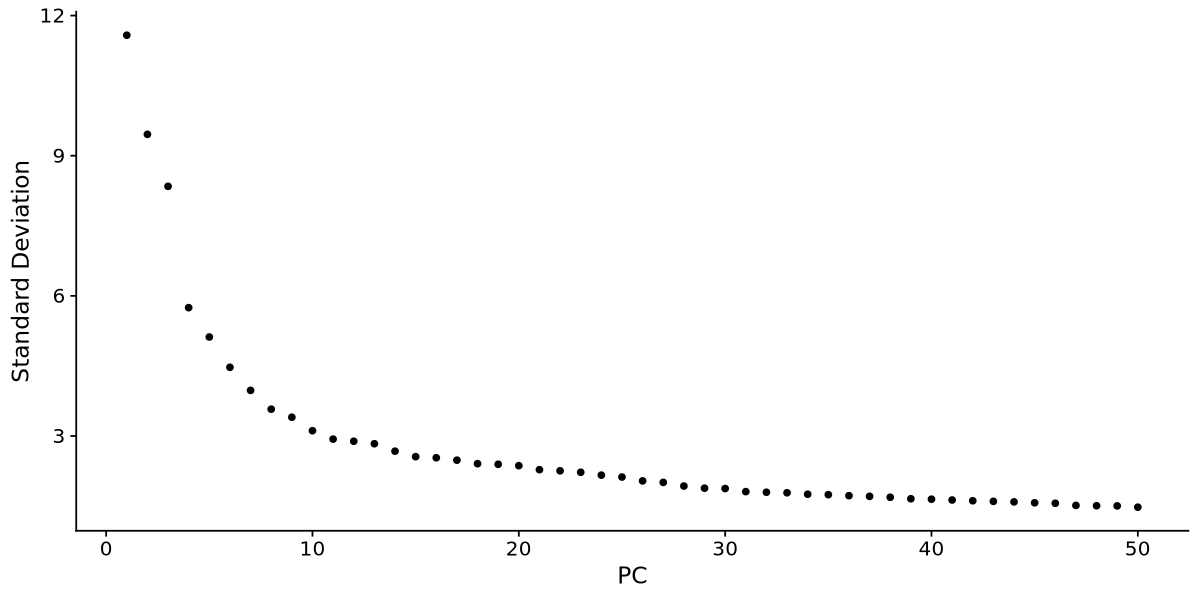

In [31]:
#make elbow plot
options(repr.plot.height=5, repr.plot.width=10)
ElbowPlot(PDAC, ndims=50)
#in GSE213243 decided to use 40 PC, staying consistent across datasets

In [32]:
#Find neighbours (make sure number matches no. features chosen above)
PDAC <- FindNeighbors(PDAC, dims = 1:40)

Computing nearest neighbor graph

Computing SNN



In [34]:
#Run UMAP
PDAC <- RunUMAP(PDAC, dims = 1:40)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
16:03:31 UMAP embedding parameters a = 0.9922 b = 1.112

16:03:31 Read 81939 rows and found 40 numeric columns

16:03:31 Using Annoy for neighbor search, n_neighbors = 30

16:03:31 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

16:03:38 Writing NN index file to temp file /scratch/temp/8832539/RtmppBXsJM/file2b859b60e79acb

16:03:38 Searching Annoy index using 1 thread, search_k = 3000

16:04:02 Annoy recall = 100%

16:04:03 Commencing smooth kNN distance calibration using 1 thread
 with 

In [38]:
#Cluster, resolution here set to 0.2, originally tried 0.5 which gave 28 clusters, 0.2 gives 18
PDAC <- FindClusters(PDAC, resolution = 0.2)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 81939
Number of edges: 2889894

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9629
Number of communities: 18
Elapsed time: 28 seconds


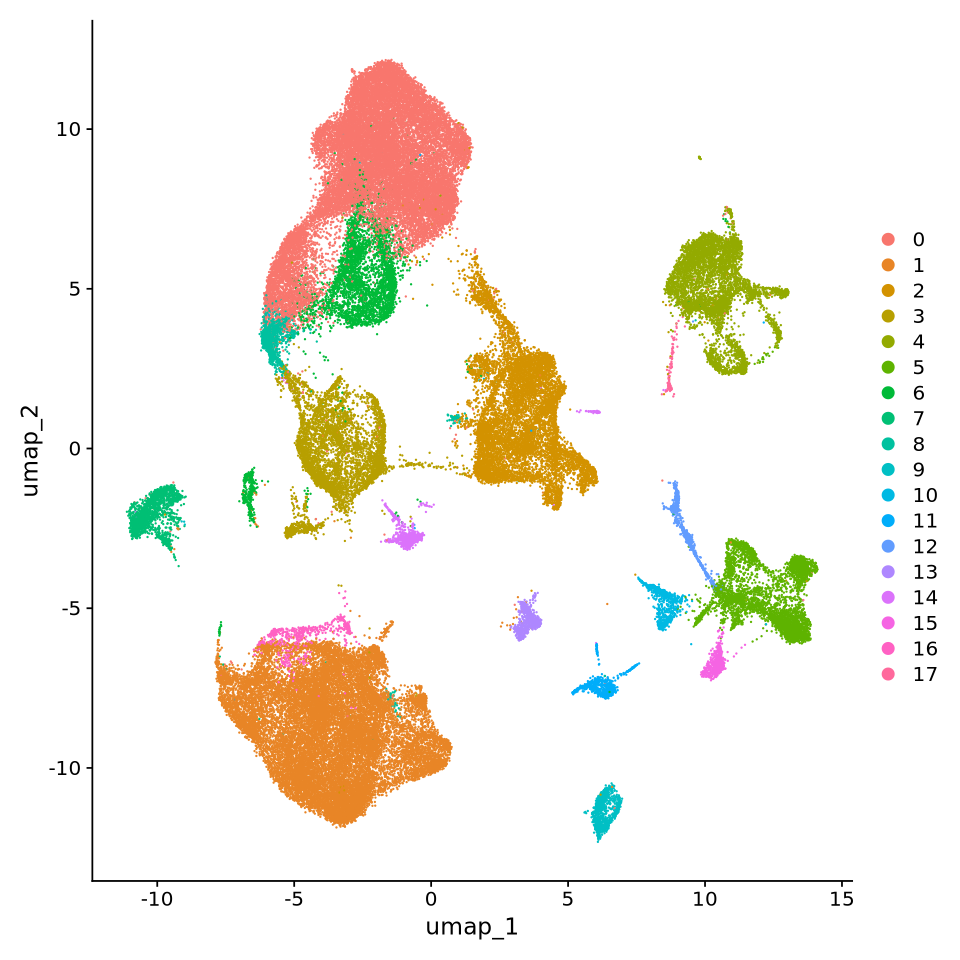

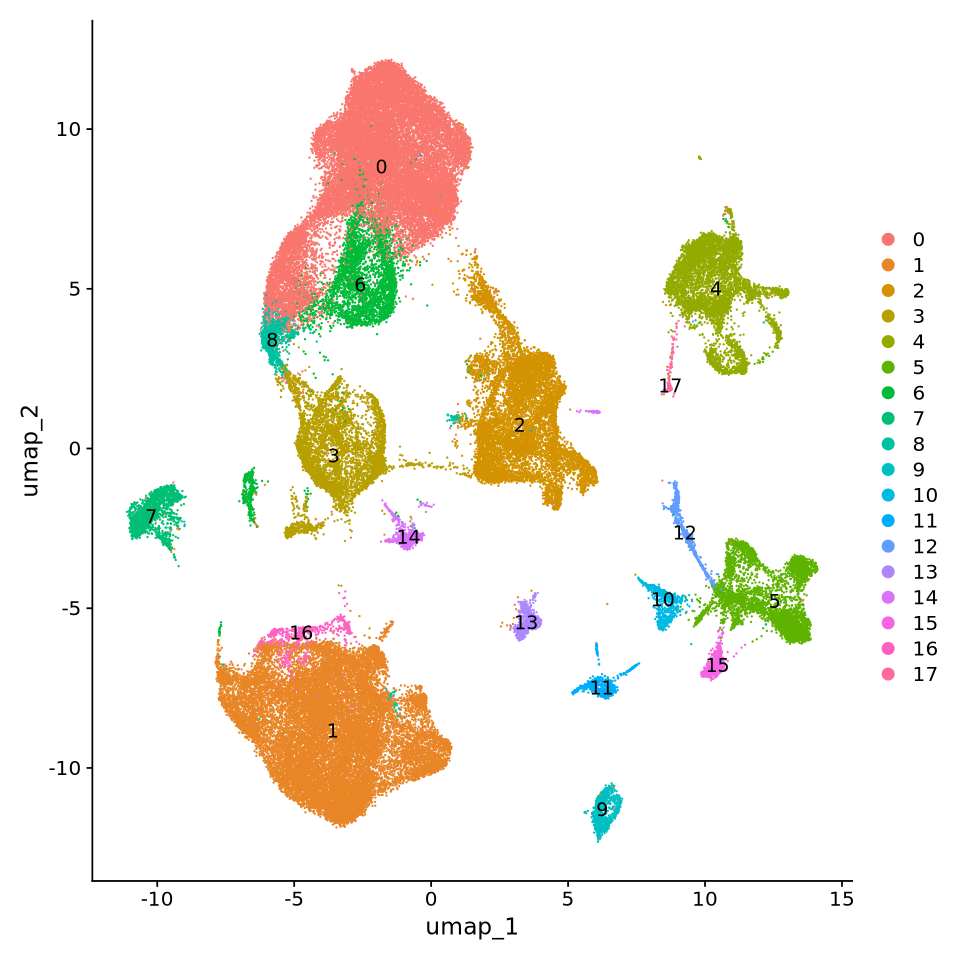

In [39]:
#Plot UMAP
options(repr.plot.height=8, repr.plot.width=8)
DimPlot(PDAC, reduction = "umap")
DimPlot(PDAC, reduction = "umap", label=TRUE)

In [40]:
#Save the object at this point so it can be loaded in without running steps above
saveRDS(PDAC, file = "/scratch/user/s4436039/scdata/GSE197177/GSE197177.RDS")

### Next part of code is about determining which cluster is the myeloid cells

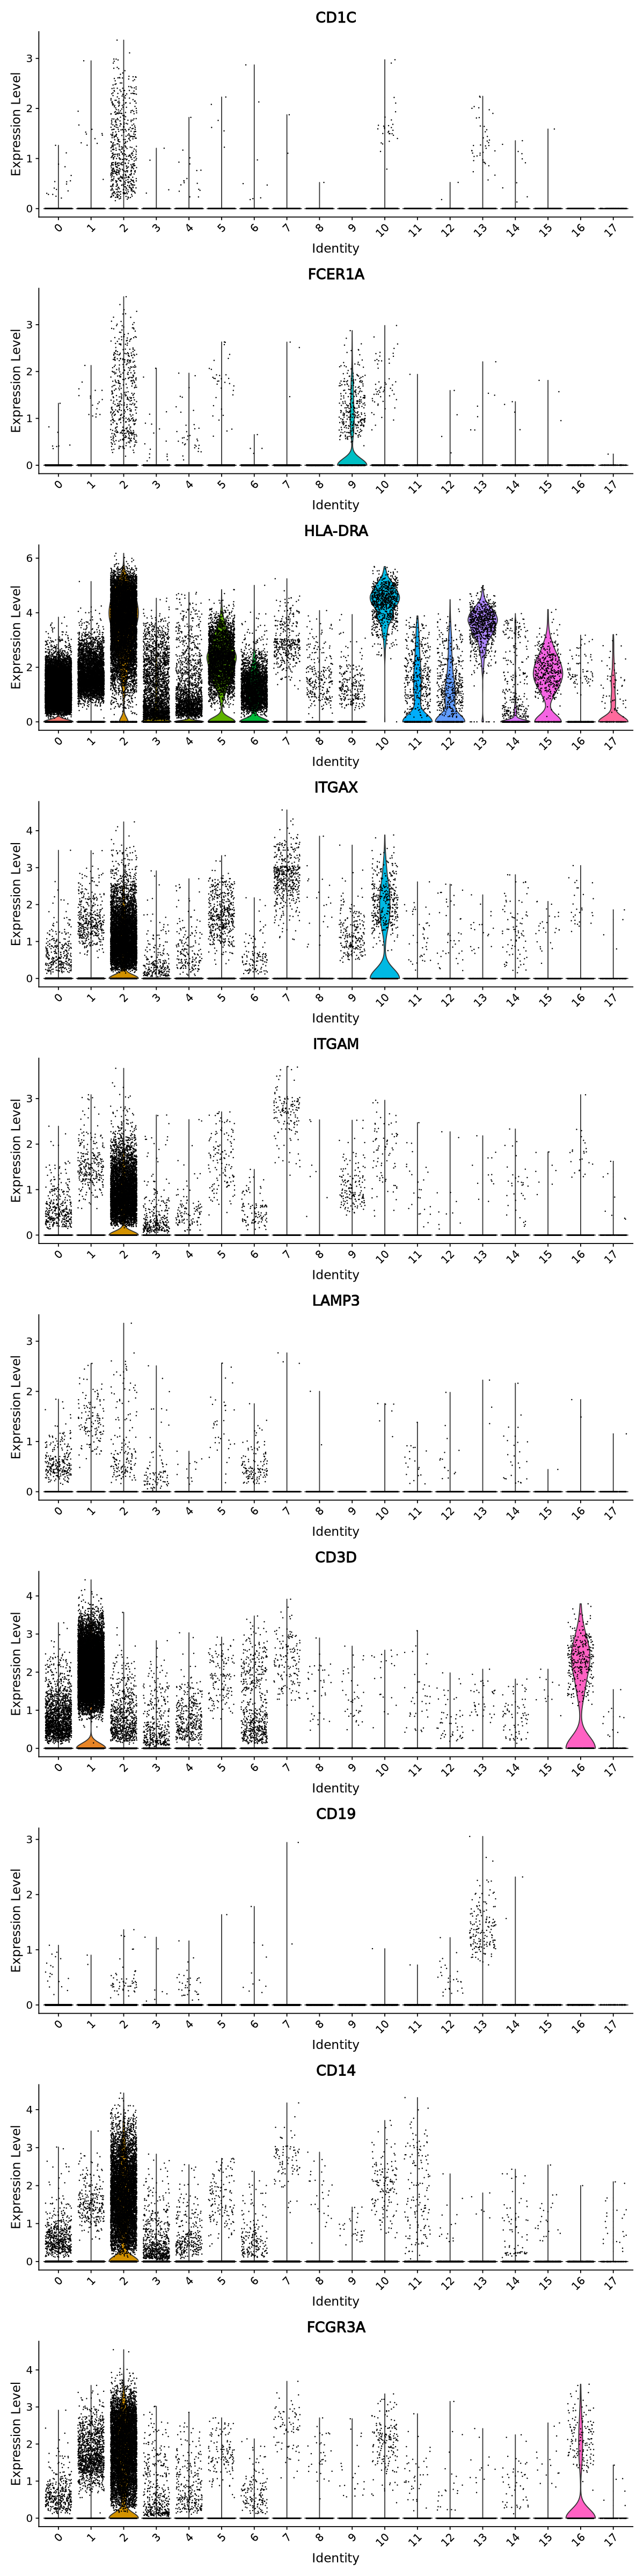

In [55]:
#Violin plots of classic markers
#ITGAX = CD11c
#ITGAM = CD11b
#BDCA2 = CLEC4C
#FCGR3A = CD16a
options(repr.plot.height=40, repr.plot.width=10)
VlnPlot(PDAC, features = c("CD1C", "FCER1A", "HLA-DRA", "ITGAX", "ITGAM", "LAMP3", "CD3D", "CD19", "CD14", "FCGR3A"), ncol=1)

#### ^ the above plot gives an error if I try and include CLEC9A or CLEC4C

Error as follows: 

``` R
Error in if (all(data[, feature] == data[, feature][1])) {: missing value where TRUE/FALSE needed
Traceback:

1. VlnPlot(PDAC, features = c("CLEC9A", "CD1C", "FCER1A", "HLA-DRA", 
 .     "ITGAX", "ITGAM", "CLEC4C", "LAMP3", "CD3D", "CD19", "CD14", 
 .     "FCGR3A"), ncol = 1)
2. ExIPlot(object = object, type = ifelse(test = split.plot, yes = "splitViolin", 
 .     no = "violin"), features = features, idents = idents, ncol = ncol, 
 .     sort = sort, assay = assay, y.max = y.max, same.y.lims = same.y.lims, 
 .     adjust = adjust, pt.size = pt.size, alpha = alpha, cols = cols, 
 .     group.by = group.by, split.by = split.by, log = log, layer = layer, 
 .     stack = stack, combine = combine, fill.by = fill.by, flip = flip, 
 .     add.noise = add.noise, raster = raster)
3. lapply(X = features, FUN = function(x) {
 .     return(SingleExIPlot(type = type, data = data[, x, drop = FALSE], 
 .         idents = idents, split = split, sort = sort, y.max = y.max, 
 .         adjust = adjust, cols = cols, pt.size = pt.size, alpha = alpha, 
 .         log = log, add.noise = add.noise, raster = raster))
 . })
4. FUN(X[[i]], ...)
5. SingleExIPlot(type = type, data = data[, x, drop = FALSE], idents = idents, 
 .     split = split, sort = sort, y.max = y.max, adjust = adjust, 
 .     cols = cols, pt.size = pt.size, alpha = alpha, log = log, 
 .     add.noise = add.noise, raster = raster)
```


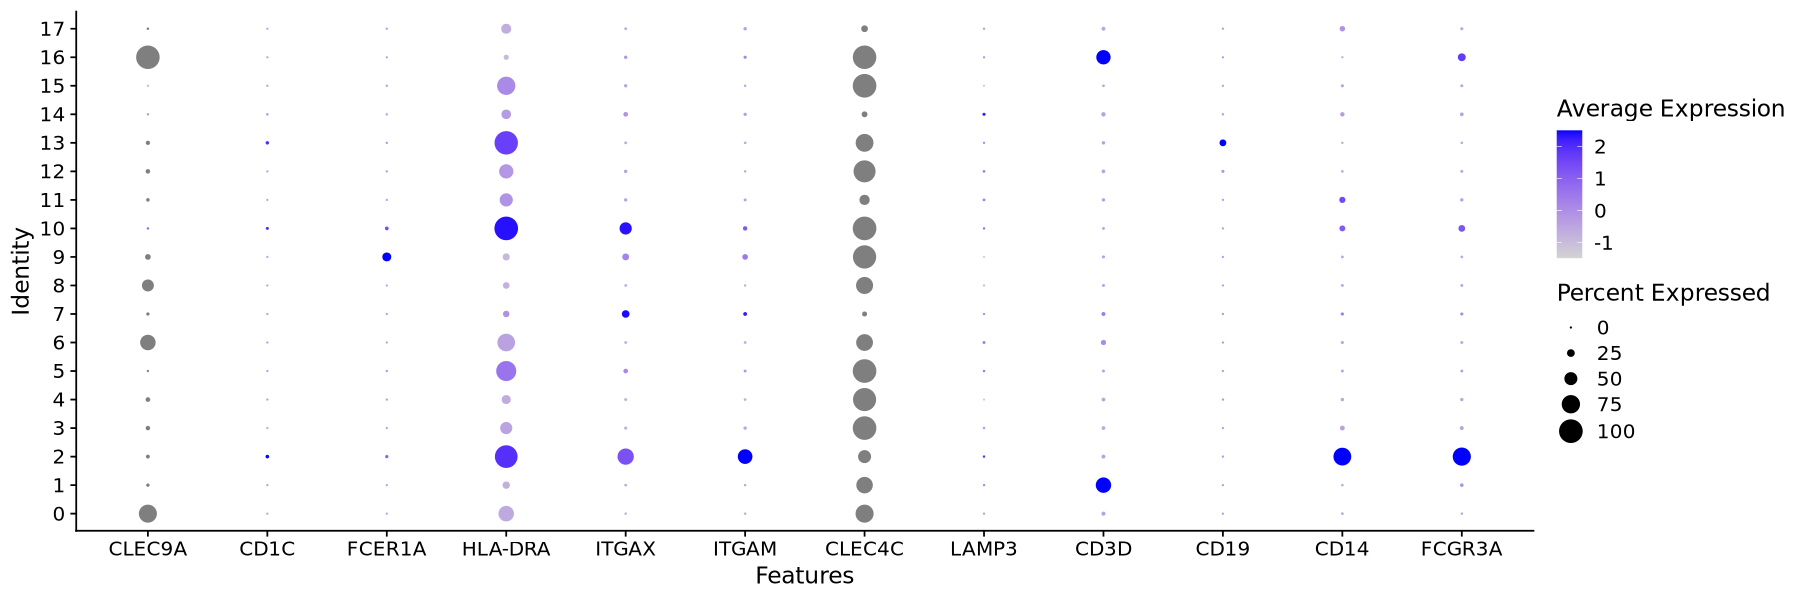

In [44]:
#Same as above but dot plot
options(repr.plot.height=5, repr.plot.width=15)
DotPlot(PDAC, features = c("CLEC9A", "CD1C", "FCER1A", "HLA-DRA", "ITGAX", "ITGAM", "CLEC4C", "LAMP3", "CD3D", "CD19", "CD14", "FCGR3A"))

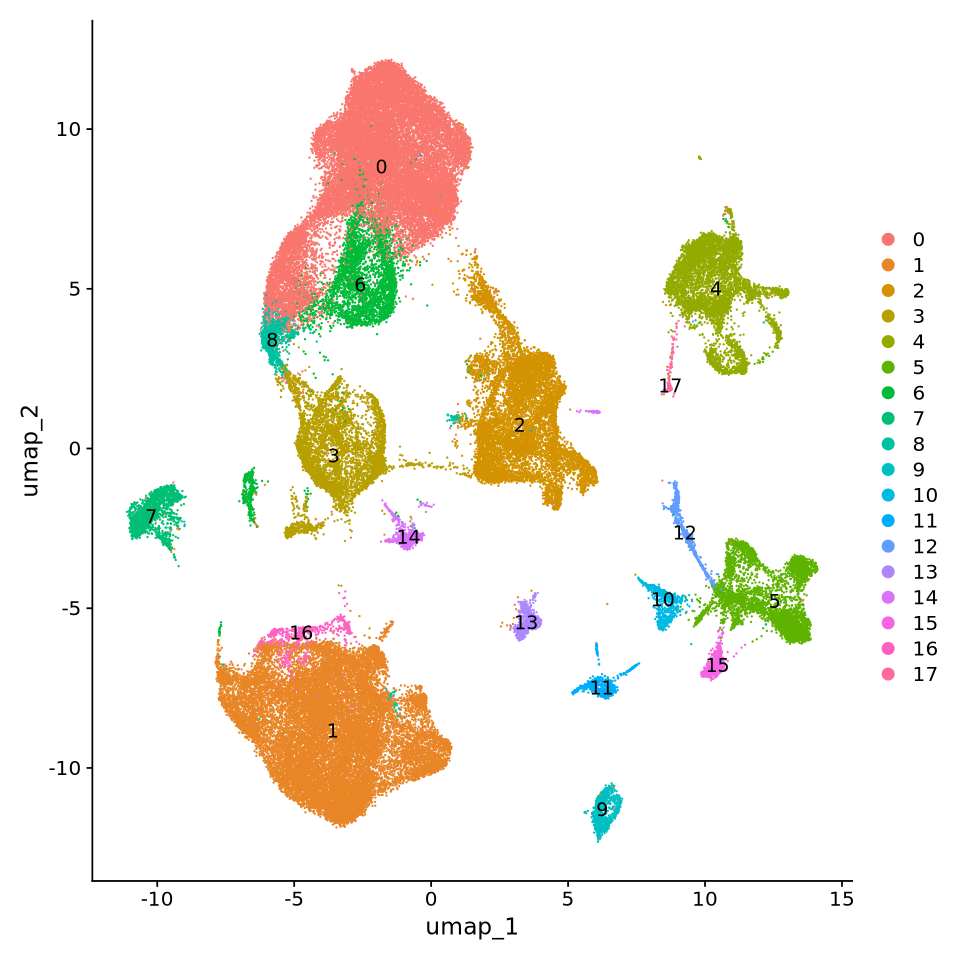

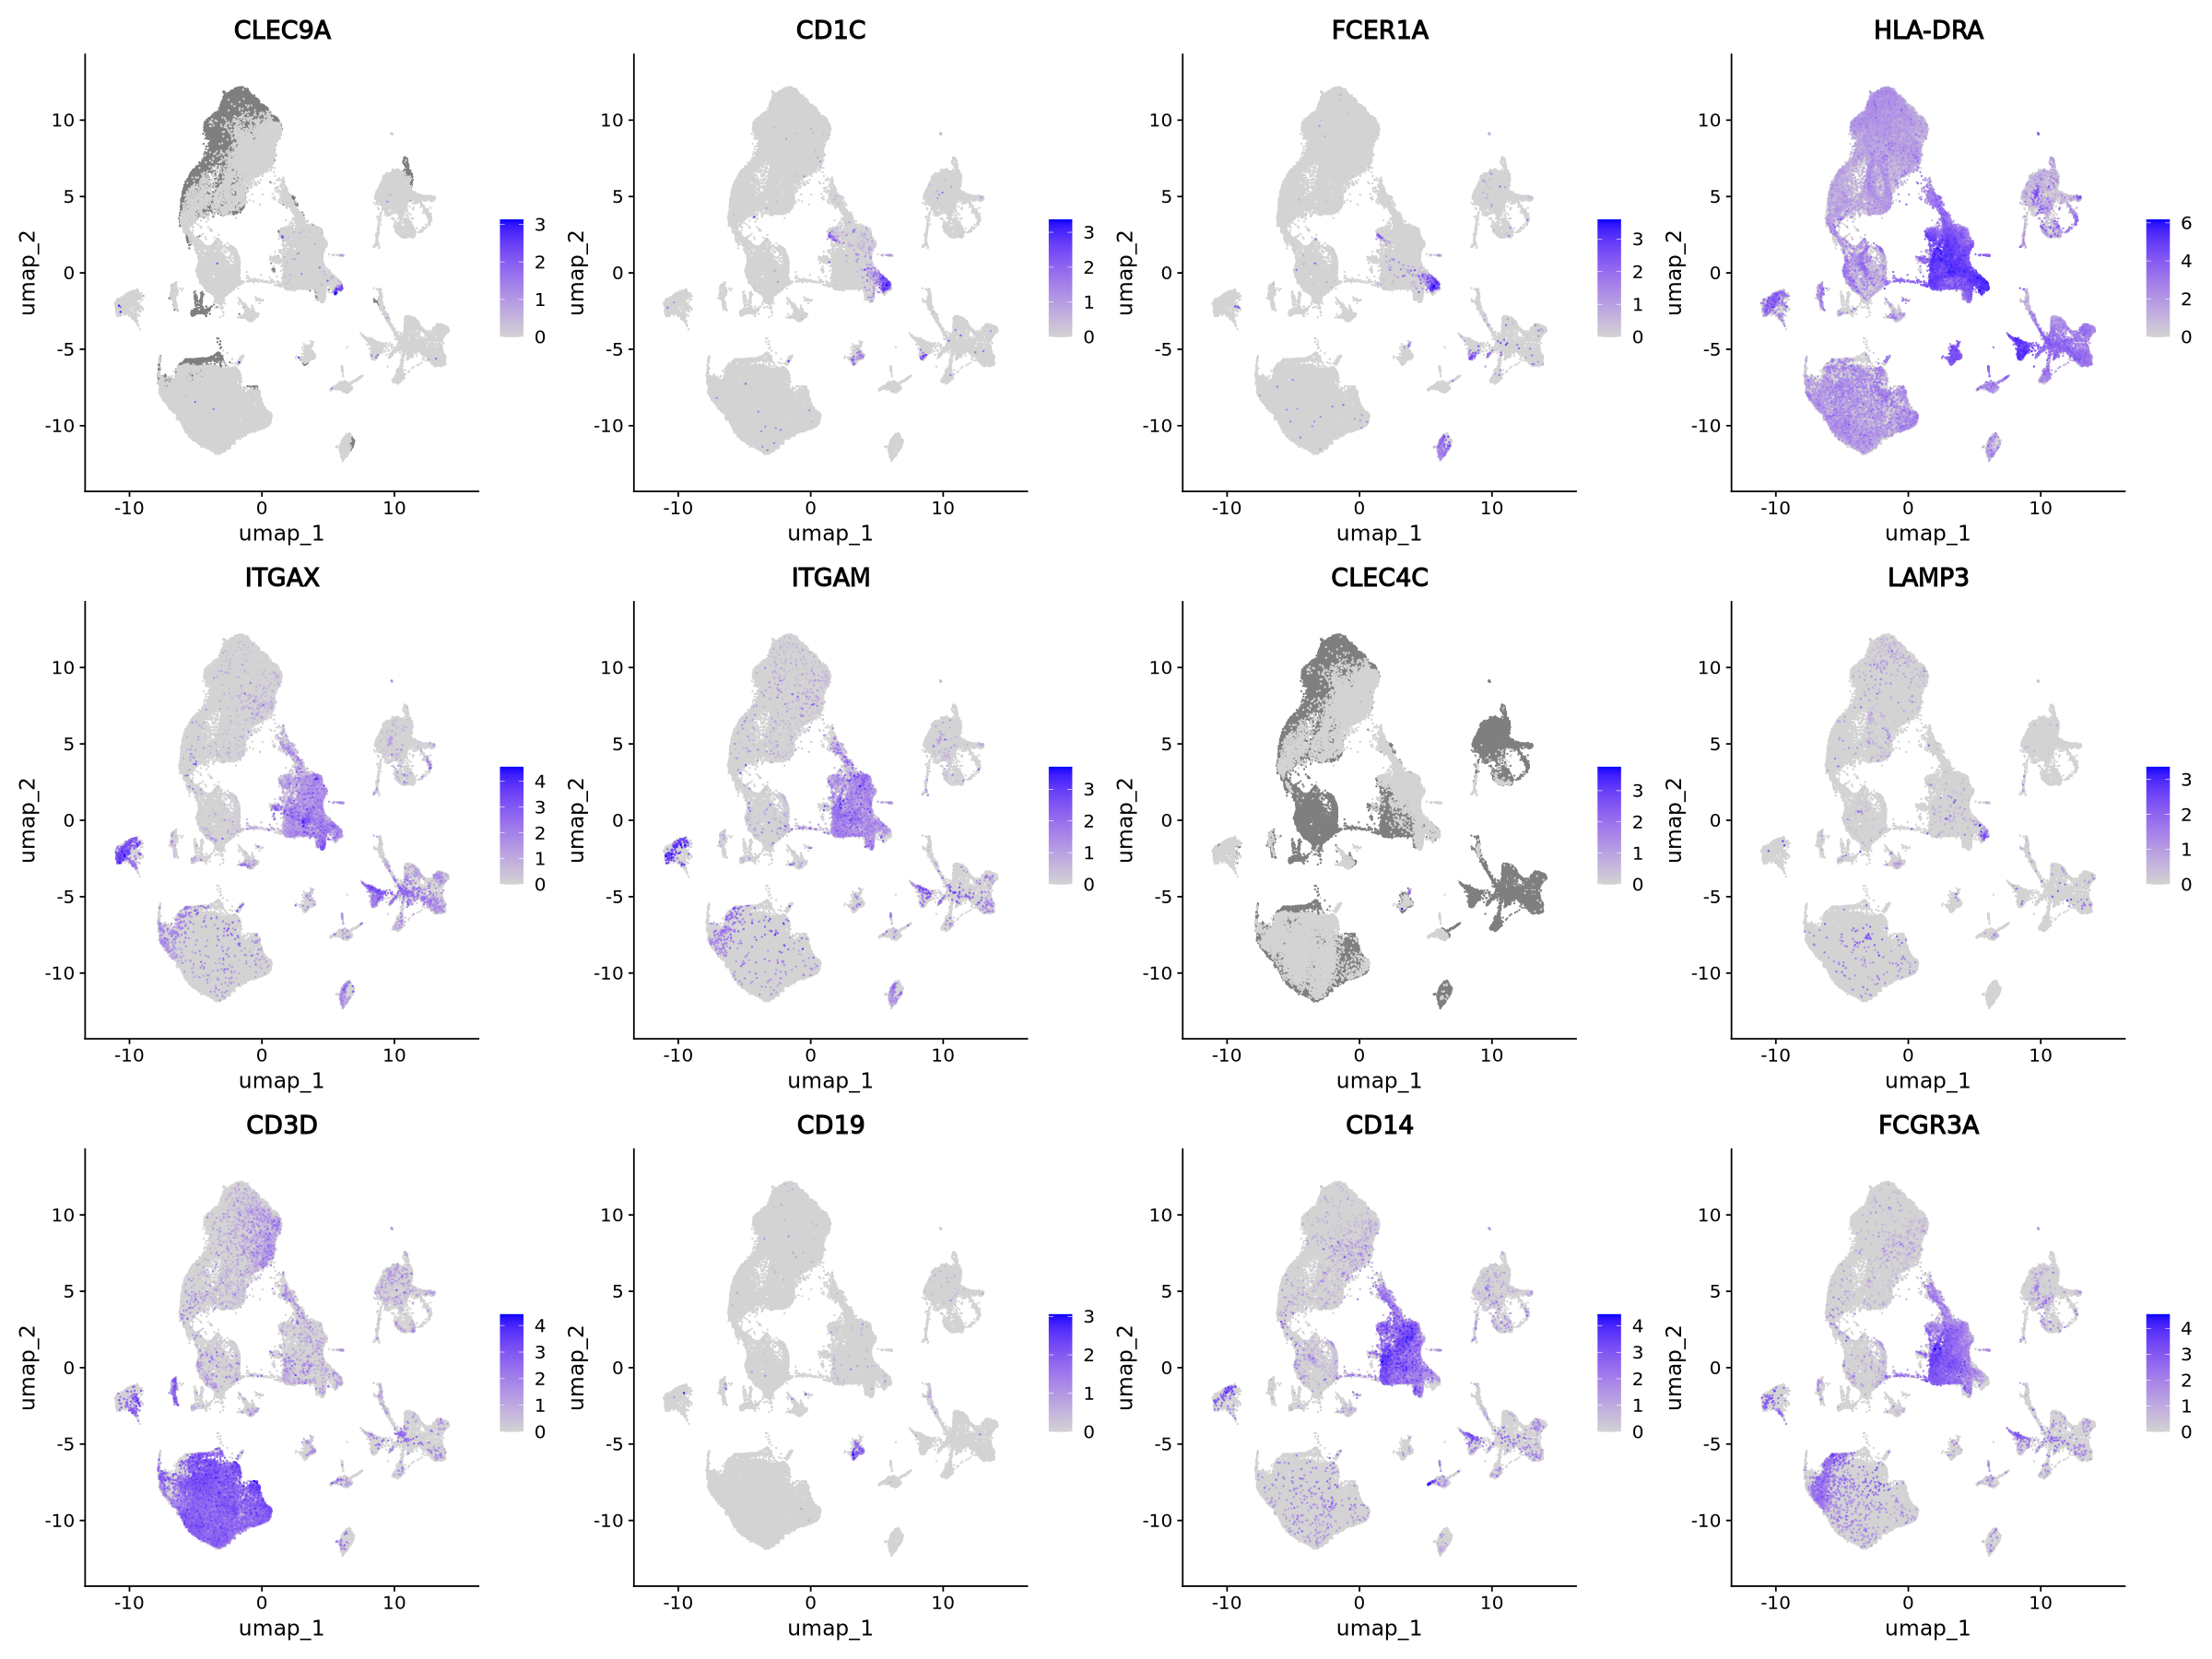

In [45]:
#Same again but plotted over UMAP
options(repr.plot.height=8, repr.plot.width=8)
DimPlot(PDAC, reduction = "umap", label=TRUE)

options(repr.plot.height=15, repr.plot.width=20)
FeaturePlot(PDAC, features = c("CLEC9A", "CD1C", "FCER1A", "HLA-DRA", "ITGAX", "ITGAM", "CLEC4C", "LAMP3", "CD3D", "CD19", "CD14", "FCGR3A"), order = TRUE)

#### From above it looks like cluster 2 contains myeloid cells, subsetting out cluster 2
* however CD11b and CD11c expression also in cluster 7?
* also what does the grey in CLEC9A and CLEC4C mean?

In [56]:
head(PDAC@meta.data)

orig.ident nCount_RNA nFeature_RNA
GSE197177_Case1-YF_AAACCCAAGAGCACTG-1 GSE197177   4039       946        
GSE197177_Case1-YF_AAACCCAAGCTAATCC-1 GSE197177  20821      4845        
GSE197177_Case1-YF_AAACCCAAGGCTGTAG-1 GSE197177  12283      3574        
GSE197177_Case1-YF_AAACCCAAGTTGAATG-1 GSE197177   3450      1061        
GSE197177_Case1-YF_AAACCCACAAACAGGC-1 GSE197177   4825      1767        
GSE197177_Case1-YF_AAACCCACAACTAGAA-1 GSE197177   4951      1950        
                                      sample_type cancer_type patient_id
GSE197177_Case1-YF_AAACCCAAGAGCACTG-1 tumour      PDAC        Case1     
GSE197177_Case1-YF_AAACCCAAGCTAATCC-1 tumour      PDAC        Case1     
GSE197177_Case1-YF_AAACCCAAGGCTGTAG-1 tumour      PDAC        Case1     
GSE197177_Case1-YF_AAACCCAAGTTGAATG-1 tumour      PDAC        Case1     
GSE197177_Case1-YF_AAACCCACAAACAGGC-1 tumour      PDAC        Case1     
GSE197177_Case1-YF_AAACCCACAACTAGAA-1 tumour      PDAC        Case1     
                                      percent.mt RNA_snn_res.0.5
GSE197177_Case1-YF_AAACCCAAGAGCACTG-1 58.133201  7              
GSE197177_Case1-YF_AAACCCAAGCTAATCC-1 16.502570  4              
GSE197177_Case1-YF_AAACCCAAGGCTGTAG-1  5.698933  4              
GSE197177_Case1-YF_AAACCCAAGTTGAATG-1 50.985507  7              
GSE197177_Case1-YF_AAACCCACAAACAGGC-1  3.854922  5              
GSE197177_Case1-YF_AAACCCACAACTAGAA-1 24.257726  0              
                                      seurat_clusters RNA_snn_res.0.2
GSE197177_Case1-YF_AAACCCAAGAGCACTG-1 0               0              
GSE197177_Case1-YF_AAACCCAAGCTAATCC-1 0               0              
GSE197177_Case1-YF_AAACCCAAGGCTGTAG-1 0               0              
GSE197177_Case1-YF_AAACCCAAGTTGAATG-1 0               0              
GSE197177_Case1-YF_AAACCCACAAACAGGC-1 3               3              
GSE197177_Case1-YF_AAACCCACAACTAGAA-1 0               0

In [57]:
myeloid_PDAC <- subset(PDAC, subset = RNA_snn_res.0.2 %in% c("2"))

In [58]:
myeloid_PDAC

An object of class Seurat 
25870 features across 9802 samples within 1 assay 
Active assay: RNA (25870 features, 2000 variable features)
 17 layers present: counts.1, counts.2, counts.3, counts.4, counts.5, counts.6, counts.7, counts.8, data.1, data.2, data.3, data.4, data.5, data.6, data.7, data.8, scale.data
 2 dimensional reductions calculated: pca, umap

In [59]:
saveRDS(myeloid_PDAC, "/scratch/user/s4436039/scdata/GSE197177/GSE197177_myeloid.RDS")

Following the above then need to move entire GSE184880 folder from scratch to rdm
``` bash
rsync -azvhp /scratch/user/s4436039/scdata/GSE197177/ /QRISdata/Q5935/nikita/scdata/GSE197177
```